# CSE144 Homework 1 - Winter 2024

# Assignment Overview
In this homework, we'll engage in standard data preprocessing, construct a linear regression model to estimate song popularity using various attributes like energy, acoustics, and more. We're using the [Song Popularity Dataset](https://www.kaggle.com/datasets/yasserh/song-popularity-dataset) from Kaggle. Additionally, you'll be developing a logistic regression trainer.

# Required Libraries
You're expected to employ NumPy, Pandas, and scikit-learn's `train_test_split()` for this task. Additionally, Matplotlib is provided for plotting training and validation losses.

## Submission
Please submit your completed notebook with the outputs.

## Grading Criteria

Total Points: 72
- Data Preprocessing (12 points)
    - Eliminate null entries (2 points)
    - Identify and remove outliers (5 points)
    - Standardize data (5 points)
- Data Division (10 points)
    - Separating test data (5 points)
    - K-fold division for training and validation (5 points)
- Linear Regression Model (25 points)
    - Mean Squared Error (MSE) calculation (3 points)
    - Gradient computation (5 points)
    - Setting epochs and learning rate (0 points)
    - Initializing theta (3 points)
    - Converting dataframe to NumPy array (3 points)
    - Model training (5 points)
        - Track training and validation losses (2 points)
        - Theta update (3 points)
    - Optimal parameter selection (3 points)
    - Test set evaluation (3 points)
- Logistic Regression Model (25 points)
    - Initialize theta (5 points)
    - Implement gradient descent step (5 points)
    - Create sigmoid function (5 points)
    - Compute cross-entropy loss (5 points)
    - Derivative of cross-entropy loss (5 points)

- Extra Credit (6 points)
    - Use a custom dataset and apply your logistic regression model for training and evaluation. Document your findings.


In [1]:
# It is recommended to use a Python environment version 3.10 or higher
!python --version

Python 3.11.4


In [2]:
%matplotlib inline

In [3]:
from typing import List, Tuple
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from tqdm import trange
import random

# Set a fixed random seed for reproducibility
seed = 144
random.seed(seed)
np.random.seed(seed)


<class 'pandas.core.frame.DataFrame'>
Index: 18835 entries, 0 to 18834
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   song_popularity   18714 non-null  float64
 1   song_duration_ms  18717 non-null  float64
 2   acousticness      18717 non-null  float64
 3   danceability      18712 non-null  float64
 4   energy            18697 non-null  float64
 5   instrumentalness  18700 non-null  float64
 6   key               18721 non-null  float64
 7   liveness          18695 non-null  float64
 8   loudness          18716 non-null  float64
 9   audio_mode        18715 non-null  float64
 10  speechiness       18727 non-null  float64
 11  tempo             18715 non-null  float64
 12  audio_valence     18709 non-null  float64
dtypes: float64(13)
memory usage: 2.0 MB


array([[<Axes: title={'center': 'song_popularity'}>,
        <Axes: title={'center': 'song_duration_ms'}>,
        <Axes: title={'center': 'acousticness'}>,
        <Axes: title={'center': 'danceability'}>],
       [<Axes: title={'center': 'energy'}>,
        <Axes: title={'center': 'instrumentalness'}>,
        <Axes: title={'center': 'key'}>,
        <Axes: title={'center': 'liveness'}>],
       [<Axes: title={'center': 'loudness'}>,
        <Axes: title={'center': 'audio_mode'}>,
        <Axes: title={'center': 'speechiness'}>,
        <Axes: title={'center': 'tempo'}>],
       [<Axes: title={'center': 'audio_valence'}>, <Axes: >, <Axes: >,
        <Axes: >]], dtype=object)

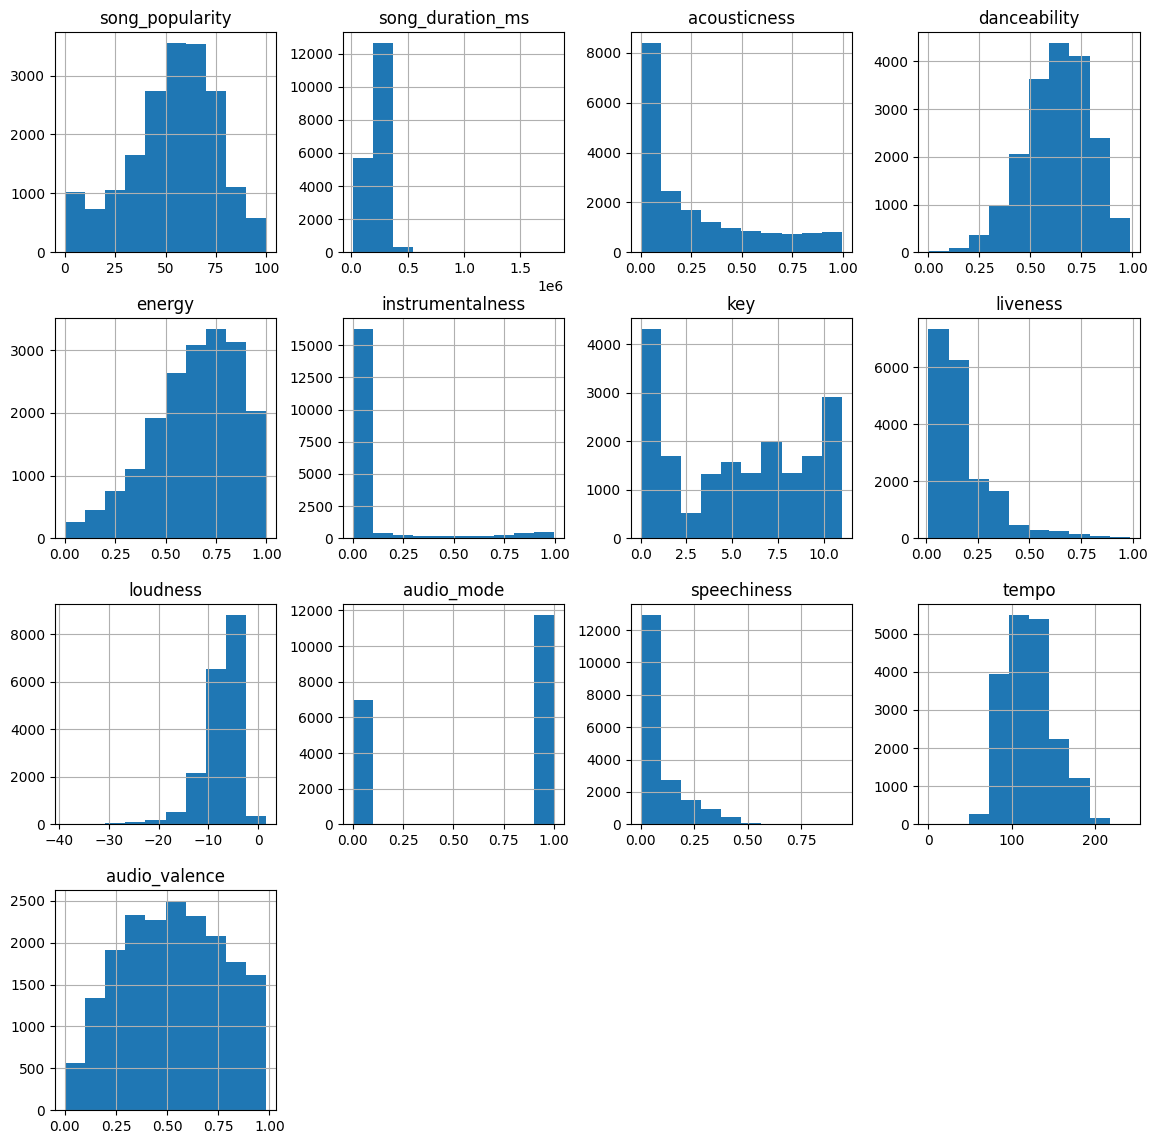

In [4]:
# Importing and Exploring the Dataset
song_data = pd.read_csv("./song_data.csv", index_col=0).drop(["song_name"], axis=1)

# Data Overview
song_data.info()
song_data.hist(figsize=(14, 14))


### Cleaning Data
`song_data.info()` shows that there are some missing values in the dataset. Also, we can see from the histogram that outliers exist for some features. Moreover, the range of different features has a huge gap: most in (0,1), but some are on the order of 1e2, or even 1e5. In the following you need to perform:

1. Eliminate rows with missing data.
2. For 'song_duration_ms' and 'instrumentalness', discard outliers using the interquartile range.
3. Apply Z-score normalization for independent variables and scale 'song_popularity' from [0,100] to [0,1].


In [5]:

# Removing rows with missing values
# ========== INSERT YOUR CODE BELOW ==========
song_data.dropna(inplace=True)
# ========== CODE ENDS HERE ============

'''
Outlier removal for 'song_duration_ms' and 'instrumentalness' using the interquartile range.
Calculate IQR as q3 - q1, and define the range as [q1 - 1.5 * IQR, q3 + 1.5 * IQR].
Utilize the 'quantile()' function for this purpose.
'''
for feature in ['song_duration_ms', 'instrumentalness']:
    # ========== INSERT YOUR CODE BELOW ==========
    q3 = song_data[feature].quantile(0.75)
    q1 = song_data[feature].quantile(0.25)
    iqr = q3-q1
    mmin = q1 - 1.5 * iqr
    mmax = q3 + 1.5 * iqr
    indexAge = song_data[ (song_data[feature] < mmin) | (song_data[feature] > mmax) ].index
    song_data.drop(indexAge , inplace=True)
    # ========== CODE ENDS HERE ============
song_data = song_data.reset_index(drop=True)

'''
Normalize independent features with z-score and scale the dependent 'song_popularity' feature to [0, 1].
Use feature-specific mean and standard deviation.
'''
# ========== INSERT YOUR CODE BELOW ==========
features_list = song_data.columns.tolist()
features_list.remove("song_popularity")
for feature in features_list:
    mean = song_data[feature].mean()
    std = song_data[feature].std()
    song_data[feature] = (song_data[feature] - mean)/std

# scaling value to [0,1]
min_value = song_data['song_popularity'].min()
max_value = song_data['song_popularity'].max()
song_data['song_popularity'] = (song_data['song_popularity'] - min_value) / (max_value - min_value)


# ========== CODE ENDS HERE ============


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12932 entries, 0 to 12931
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   song_popularity   12932 non-null  float64
 1   song_duration_ms  12932 non-null  float64
 2   acousticness      12932 non-null  float64
 3   danceability      12932 non-null  float64
 4   energy            12932 non-null  float64
 5   instrumentalness  12932 non-null  float64
 6   key               12932 non-null  float64
 7   liveness          12932 non-null  float64
 8   loudness          12932 non-null  float64
 9   audio_mode        12932 non-null  float64
 10  speechiness       12932 non-null  float64
 11  tempo             12932 non-null  float64
 12  audio_valence     12932 non-null  float64
dtypes: float64(13)
memory usage: 1.3 MB


array([[<Axes: title={'center': 'song_popularity'}>,
        <Axes: title={'center': 'song_duration_ms'}>,
        <Axes: title={'center': 'acousticness'}>,
        <Axes: title={'center': 'danceability'}>],
       [<Axes: title={'center': 'energy'}>,
        <Axes: title={'center': 'instrumentalness'}>,
        <Axes: title={'center': 'key'}>,
        <Axes: title={'center': 'liveness'}>],
       [<Axes: title={'center': 'loudness'}>,
        <Axes: title={'center': 'audio_mode'}>,
        <Axes: title={'center': 'speechiness'}>,
        <Axes: title={'center': 'tempo'}>],
       [<Axes: title={'center': 'audio_valence'}>, <Axes: >, <Axes: >,
        <Axes: >]], dtype=object)

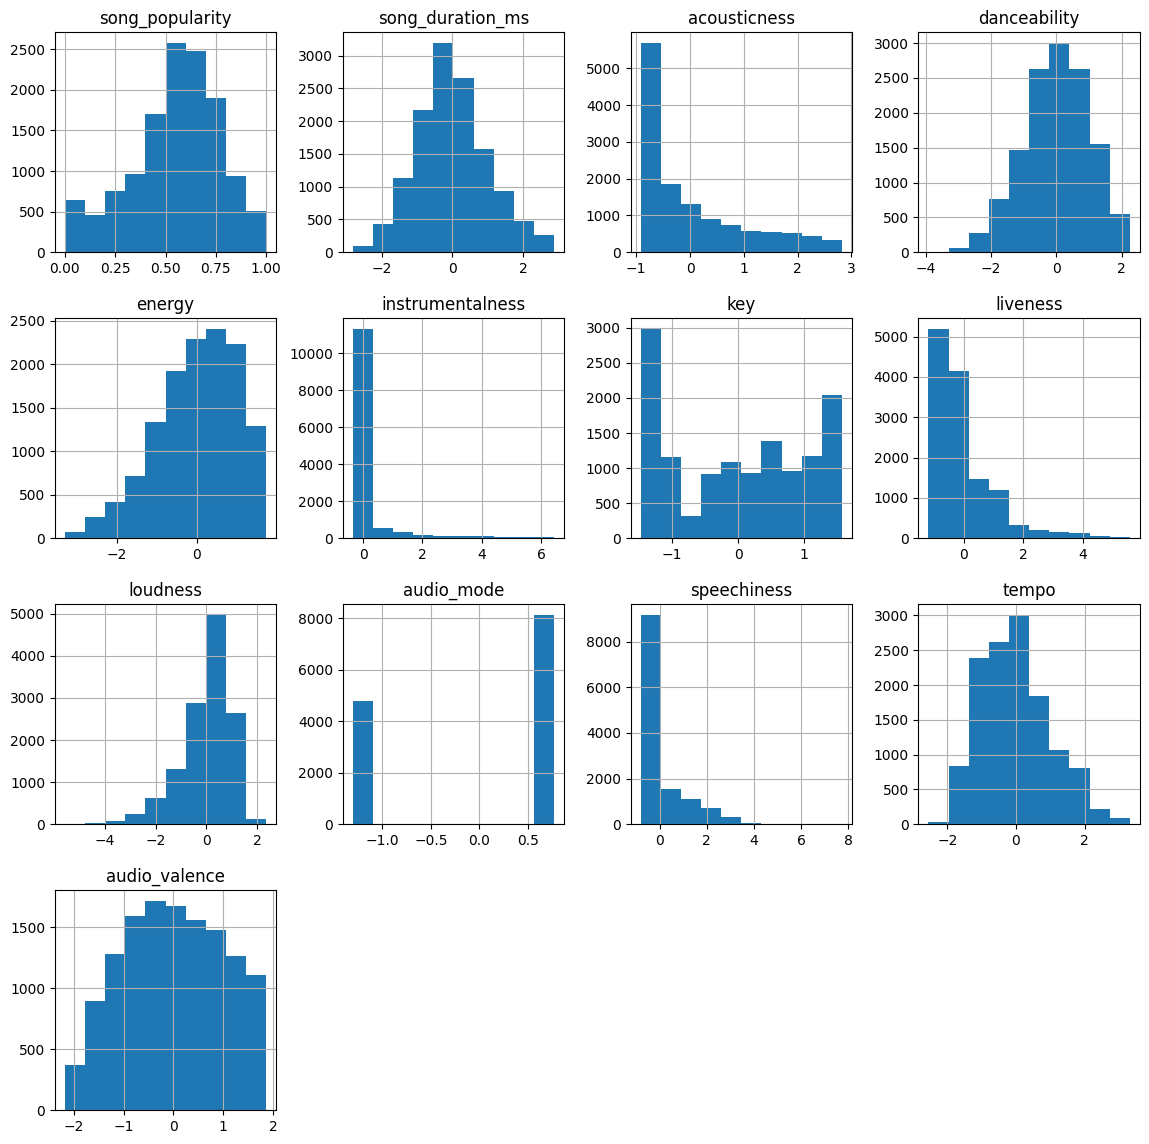

In [6]:
song_data.info()
song_data.hist(figsize=(14, 14))


## Preparing the Dataset

1.Split the dataset into training, validation, and test sets. Allocate 30% for the test set.

2.Apply 5-fold validation on the remaining 70% to create training and validation pairs.


In [7]:

# Function to split the test set
def test_split(song_data, test_size: float = 0.3, seed=seed):
    '''
    Split the dataset into training/validation and test sets using the `train_test_split()` function.
    '''
    # ========== INSERT YOUR CODE BELOW ==========
    y = song_data["song_popularity"]
    X = song_data.drop(columns="song_popularity")

    X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)
    # ========== CODE ENDS HERE ============

    return (X_train_val.reset_index(drop=True),
            y_train_val.reset_index(drop=True),
            X_test.reset_index(drop=True),
            y_test.reset_index(drop=True))

# Function to create train-validation pairs
def train_val_split(X_train_val, y_train_val, k=5, seed=seed):
    '''
    Generate k pairs of training and validation sets based on shuffled indices.
    The output is a list of tuples: [(X_train1, y_train1, X_val1, y_val1), ..., (X_traink, y_traink, X_valk, y_valk)]
    '''
    index_shuffle = list(X_train_val.index)
    random.shuffle(index_shuffle)
    index_split_list = [[index_shuffle[i+j] for i in range(0, len(index_shuffle), 5) if i+j < len(index_shuffle)] for j in range(5)]
    train_val_pairs = [(None, None, None, None) for _ in range(k)]
    # ========== INSERT YOUR CODE BELOW ==========
    train_val_pairs = []
    for i in range(k):
        # get validation indices
        validation_indices = index_split_list[i]

        # get training indices
        training_indices = []
        for j in range(k):
            if j != i:
                training_indices.extend(index_split_list[j])


        X_train = X_train_val.loc[training_indices]
        y_train = y_train_val.loc[training_indices]
        X_val = X_train_val.loc[validation_indices]
        y_val = y_train_val.loc[validation_indices]


        train_val_pairs.append((X_train, y_train, X_val, y_val))
    # ========== CODE ENDS HERE ============
    return train_val_pairs

X_train_val, y_train_val, X_test, y_test = test_split(song_data)
train_val_pairs = train_val_split(X_train_val, y_train_val)


## Implementing Linear Regression

 Tip: Prepend a column of 1's to the feature matrix X for easy computation of X * theta. 
 Ensure to add an extra dimension to your feature matrix for shape consistency. 
 Refer to this [illustration](https://cs231n.github.io/linear-classify/#:~:text=Illustration%20of%20the,and%20the%20biases.) for more details.

 Your report should include training, validation, and test losses. Experiment with different learning rates and epoch combinations, and report the best results based on validation loss.


Epoch:   0%|          | 0/1000 [00:00<?, ?it/s]

Epoch: 100%|██████████| 1000/1000 [00:00<00:00, 2967.00it/s]


Final training loss for the best model: 0.35097502592218693
Final validation loss for the best model: 0.344667641785911
Best model parameters: [ 0.00404888 -0.00951131  0.02846251 -0.03316745 -0.00768607 -0.0047016
 -0.00986797  0.04294014  0.00233903  0.00167918  0.00106201 -0.01793989]


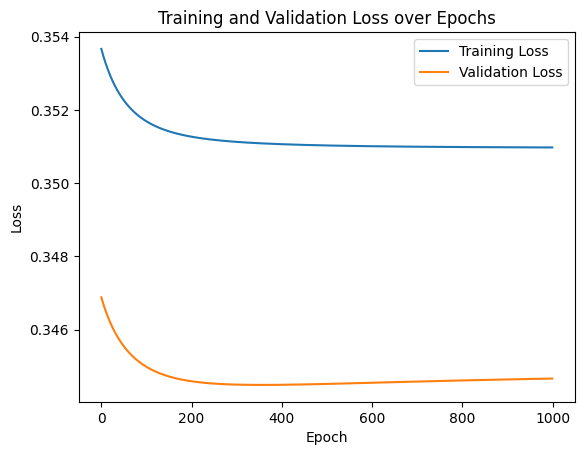

Test set loss: 0.3465591352994034


In [8]:

# Function to calculate MSE
def MSE_loss(prediction: np.ndarray, actual: np.ndarray):
    # ========== INSERT YOUR CODE BELOW ==========
    return np.mean(np.square((prediction - actual)))
    # ========== CODE ENDS HERE ============

# Function to compute gradient
def gradient(features: np.ndarray, labels: np.ndarray, theta: np.ndarray):
    # ========== INSERT YOUR CODE BELOW ==========

    # Number of training examples
    m = len(labels)

    # write down the predicted values
    predicted_values = np.dot(theta,features.T)

    # calculate the loss
    loss = predicted_values - labels


    return np.dot(loss,features)/ m
    # ========== CODE ENDS HERE ============

# Define the number of epochs and learning rate
# ========== INSERT YOUR CODE BELOW ==========
num_epochs = 1000
learning_rate = 1e-2
# ========== CODE ENDS HERE ============
k = 5
train_loss_history = [[] for _ in range(k)]
val_loss_history = [[] for _ in range(k)]

theta_optimal = None
optimal_index = None
lowest_loss = None

for i in range(k):
    X_train, y_train, X_val, y_val = train_val_pairs[i]

    # Convert dataframe to numpy array
    # ========== INSERT YOUR CODE BELOW ==========
    X_train_values = X_train.values
    y_train_values = y_train.values
    X_val_values = X_val.values
    y_val_values = y_val.values
    # ========== CODE ENDS HERE ============

    # Initialize theta
    # ========== INSERT YOUR CODE BELOW ==========
    theta = np.zeros(X_train_values.shape[1])
    # ========== CODE ENDS HERE ============

    for epoch in trange(num_epochs, desc="Epoch"):
        # Calculate loss and update loss histories
        # ========== INSERT YOUR CODE BELOW ==========
        # calculate the train prediction and loss with actual values
        train_predicted = np.dot(theta, X_train_values.T)
        train_loss_history[i].append(MSE_loss(train_predicted, y_train_values))

        # calculate the train prediction and loss with actual values
        val_predicted = np.dot(theta, X_val_values.T)
        val_loss_history[i].append(MSE_loss(val_predicted, y_val_values))
        # ========== CODE ENDS HERE ============

        # Parameter update
        # ========== INSERT YOUR CODE BELOW ==========
        theta = theta - (learning_rate * gradient(X_train_values, y_train_values, theta)) 
        # ========== CODE ENDS HERE ============

    # Validate and find the best parameters, storing them in theta_optimal and optimal_index
    # ========== INSERT YOUR CODE BELOW ==========
    if lowest_loss is None or val_loss_history[i][-1] < lowest_loss:
        lowest_loss = val_loss_history[i][-1]
        theta_optimal = theta
        optimal_index = i
    # ========== CODE ENDS HERE ============

print(f"Final training loss for the best model: {train_loss_history[optimal_index][-1]}")
print(f"Final validation loss for the best model: {val_loss_history[optimal_index][-1]}")
print("Best model parameters:", theta_optimal)

plt.plot(np.arange(num_epochs), train_loss_history[optimal_index], label="Training Loss")
plt.plot(np.arange(num_epochs), val_loss_history[optimal_index], label="Validation Loss")
plt.title("Training and Validation Loss over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

# Test set evaluation
# ========== INSERT YOUR CODE BELOW ==========
X_test_values = X_test.values
y_test_values = y_test.values
train_predicted = np.dot(theta_optimal, X_test_values.T)
test_loss = MSE_loss(train_predicted, y_test_values)
# ========== CODE ENDS HERE ============
print(f"Test set loss: {test_loss}")


## Logistic Regression Task

In this exercise, you are tasked with completing several functions within the `LogisticRegressionTrainer` class. It's important to remember that `gradient_descent_step()` should update parameters without returning any values. Additionally, the regularization term must be included in the `cross_entropy_loss()` function.

Tasks to complete:
* Initialize `theta` - Worth 5 points
* Implement `gradient_descent_step` function - Worth 5 points
* Define `sigmoid` function - Worth 5 points
* Code `cross_entropy_loss` function - Worth 5 points
* Write `cross_entropy_loss_derivative` function - Worth 5 points

In [9]:
class LogisticRegressionTrainer:
    def __init__(
        self,
        num_features: int,
        learning_rate: float = 1e-2,
        num_epochs: int = 500,
        lambd: float = 0.0,
    ) -> None:
        """Constructor for logistic regression trainer."""
        self.lambd = lambd
        self.learning_rate = learning_rate
        self.num_epochs = num_epochs
        self.num_features = num_features
        self.train_loss_history = []
        self.val_loss_history = []
        self.train_acc_history = []
        self.val_acc_history = []
        self.test_loss = None
        self.test_acc = None

        # Please initialize the model's weights. Any initialization strategy is acceptable.
        # ========== YOUR IMPLEMENTATION STARTS HERE ==========
        self.theta = np.random.randn(num_features + 1)
        # ========== YOUR IMPLEMENTATION ENDS HERE ============

    def gradient_descent_step(self, x: np.ndarray, y: np.ndarray) -> None:
        """
        Execute one iteration of gradient descent.

        Args:
            x: Feature matrix.
            y: Label vector.
        """
        # ========== YOUR IMPLEMENTATION STARTS HERE ==========
        # Number of training examples
        m = len(y)

        x_with_bias = np.c_[np.ones((x.shape[0], 1)), x]

        # write down the predicted values
        predicted_values = self.sigmoid(np.dot(self.theta,x_with_bias))

        # calculate the loss
        loss = predicted_values - y


        # Compute the gradient of the loss function with respect to the parameters (weights)
        gradient = np.dot(x_with_bias.T, loss) / m

        self.theta -= self.learning_rate * gradient
        # ========== YOUR IMPLEMENTATION ENDS HERE ==========

    def sigmoid(self, z: np.ndarray) -> np.ndarray:
        """
        Transform logits into probabilities.

        Args:
            z: Logits.

        Returns:
            Probabilities as a vector (or scalar if the input is scalar).
        """
        # ========== YOUR IMPLEMENTATION STARTS HERE ==========
        return 1/(1 + np.exp(-z))
        # ========== YOUR IMPLEMENTATION ENDS HERE ==========

    def cross_entropy_loss(self, pred: np.ndarray, target: np.ndarray) -> float:
        """
        Compute binary cross-entropy loss, including regularization.

        Args:
            pred: Predictions (as probabilities).
            target: Actual labels.

        Returns:
            Loss as a scalar value.
        """
        assert pred.shape == target.shape
        # ========== YOUR IMPLEMENTATION STARTS HERE ==========
        # loss without regularization
        loss = -np.mean((target * np.log(pred)) + ((1 - target) * np.log(1 - pred)))
        # regularization aspect

        regularization = (self.lambd/ (2 * len(target))) * np.sum(np.square(self.theta[1:]))
        # combine altogether

        loss += regularization
        return loss
        # ========== YOUR IMPLEMENTATION ENDS HERE ==========

    def cross_entropy_loss_derivative(self, x: np.ndarray, y: np.ndarray) -> np.ndarray:
        """
        Compute gradient of loss function with respect to theta, including L2 regularization.

        Args:
            x: Feature vectors.
            y: True labels.

        Returns:
            Gradient vector, parallel to theta.
        """
        # ========== YOUR IMPLEMENTATION STARTS HERE ==========
        # Number of training examples
        m = len(y)

        # Add bias term to feature matrix
        x_with_bias = np.c_[np.ones((x.shape[0], 1)), x]

        # Calculate predicted values
        predicted_values = self.sigmoid(np.dot(self.theta, x_with_bias.T))

        # Compute the loss
        loss = predicted_values - y

        # Compute the gradient of the loss function with respect to the parameters (weights)
        gradient = np.dot(x_with_bias.T, loss) / m

        # L2 regularization term for all but the bias term
        regularization_term = (self.lambd / m) * np.concatenate(([0], self.theta[1:]))

        # Add the regularization term to the gradient
        gradient += regularization_term

        return gradient
        # ========== YOUR IMPLEMENTATION ENDS HERE ==========

## Additional Challenge (6 points):

Implement logistic regression on a unique dataset of your choice. Train and evaluate your model, and report the outcomes.

<class 'pandas.core.frame.DataFrame'>
Index: 105 entries, 0 to 104
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   rank                            105 non-null    int64  
 1   overall_score                   105 non-null    float64
 2   academic_reputation             105 non-null    float64
 3   employer_reputation             105 non-null    float64
 4   faculty_student_ratio           105 non-null    float64
 5   citations_per_faculty           105 non-null    float64
 6   international_faculty_ratio     105 non-null    float64
 7   international_students_ratio    105 non-null    float64
 8   international_research_network  105 non-null    float64
 9   employment_outcomes             105 non-null    float64
 10  sustainability                  105 non-null    float64
dtypes: float64(10), int64(1)
memory usage: 9.8 KB


array([[<Axes: title={'center': 'rank'}>,
        <Axes: title={'center': 'overall_score'}>,
        <Axes: title={'center': 'academic_reputation'}>],
       [<Axes: title={'center': 'employer_reputation'}>,
        <Axes: title={'center': 'faculty_student_ratio'}>,
        <Axes: title={'center': 'citations_per_faculty'}>],
       [<Axes: title={'center': 'international_faculty_ratio'}>,
        <Axes: title={'center': 'international_students_ratio'}>,
        <Axes: title={'center': 'international_research_network'}>],
       [<Axes: title={'center': 'employment_outcomes'}>,
        <Axes: title={'center': 'sustainability'}>, <Axes: >]],
      dtype=object)

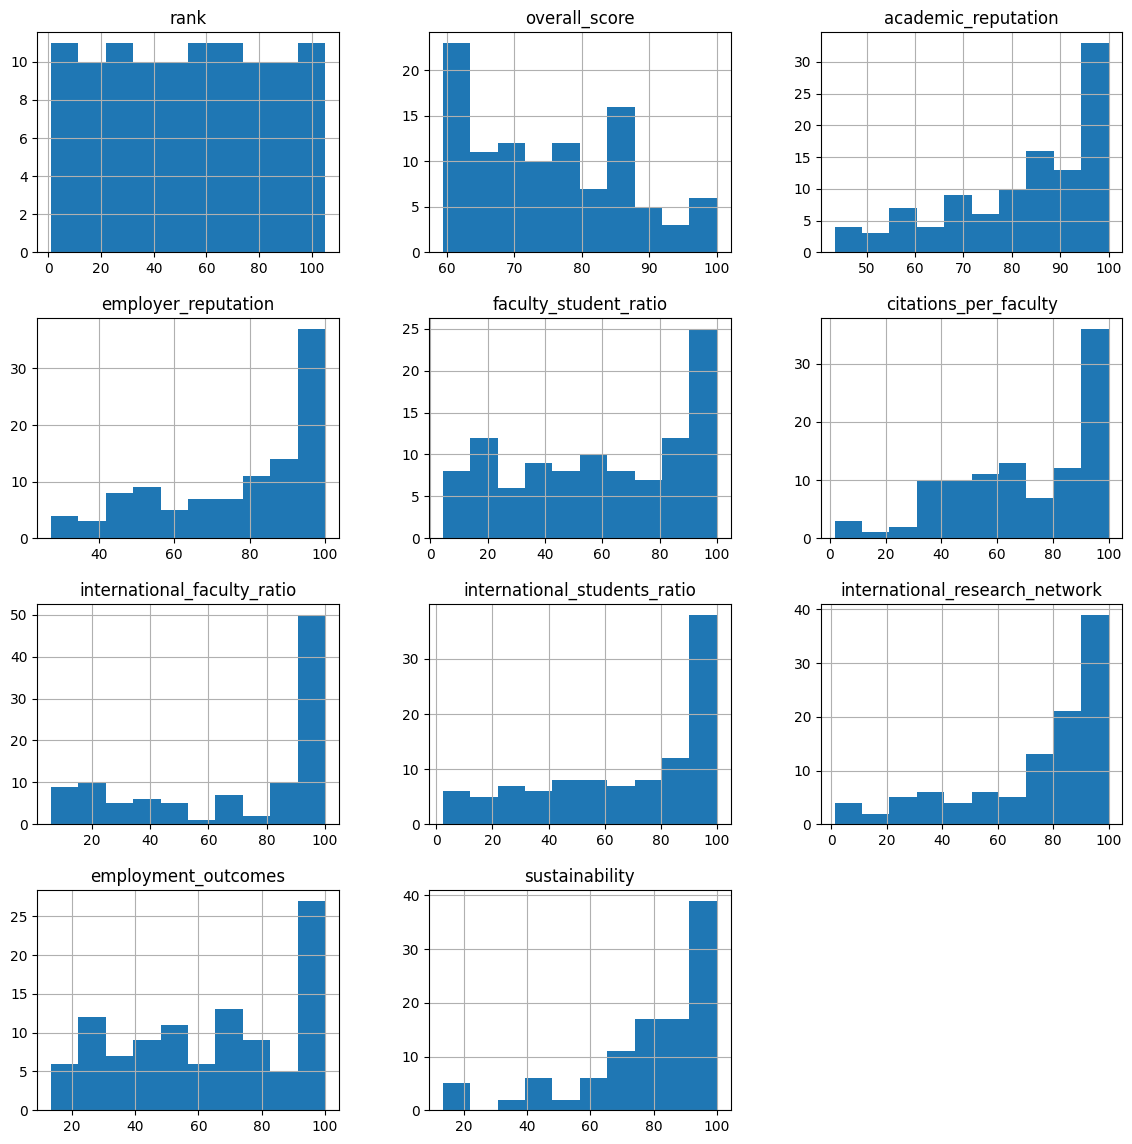

In [10]:
# Importing and Exploring the Dataset
university_data = pd.read_csv("./university.csv", index_col=0).drop(["university", "Fundos (US$)"], axis=1)

# Data Overview
university_data.info()
university_data.hist(figsize=(14, 14))


In [11]:

# Removing rows with missing values
# ========== INSERT YOUR CODE BELOW ==========
university_data.dropna(inplace=True)
# ========== CODE ENDS HERE ============

'''
Outlier removal for 'song_duration_ms' and 'instrumentalness' using the interquartile range.
Calculate IQR as q3 - q1, and define the range as [q1 - 1.5 * IQR, q3 + 1.5 * IQR].
Utilize the 'quantile()' function for this purpose.
'''
features_list = university_data.columns.tolist()
for feature in features_list:
    # ========== INSERT YOUR CODE BELOW ==========
    q3 = university_data[feature].quantile(0.75)
    q1 = university_data[feature].quantile(0.25)
    iqr = q3-q1
    mmin = q1 - 1.5 * iqr
    mmax = q3 + 1.5 * iqr
    indexAge = university_data[ (university_data[feature] < mmin) | (university_data[feature] > mmax) ].index
    university_data.drop(indexAge , inplace=True)
    # ========== CODE ENDS HERE ============
university_data = university_data.reset_index(drop=True)

'''
Normalize independent features with z-score and scale the dependent 'song_popularity' feature to [0, 1].
Use feature-specific mean and standard deviation.
'''
# ========== INSERT YOUR CODE BELOW ==========
features_list = university_data.columns.tolist()
features_list.remove("overall_score")
for feature in features_list:
    mean = university_data[feature].mean()
    std = university_data[feature].std()
    university_data[feature] = (university_data[feature] - mean)/std

# scaling value to [0,1]
min_value = university_data['overall_score'].min()
max_value = university_data['overall_score'].max()
university_data['overall_score'] = (university_data['overall_score'] - min_value) / (max_value - min_value)


# ========== CODE ENDS HERE ============


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98 entries, 0 to 97
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   rank                            98 non-null     float64
 1   overall_score                   98 non-null     float64
 2   academic_reputation             98 non-null     float64
 3   employer_reputation             98 non-null     float64
 4   faculty_student_ratio           98 non-null     float64
 5   citations_per_faculty           98 non-null     float64
 6   international_faculty_ratio     98 non-null     float64
 7   international_students_ratio    98 non-null     float64
 8   international_research_network  98 non-null     float64
 9   employment_outcomes             98 non-null     float64
 10  sustainability                  98 non-null     float64
dtypes: float64(11)
memory usage: 8.6 KB


array([[<Axes: title={'center': 'rank'}>,
        <Axes: title={'center': 'overall_score'}>,
        <Axes: title={'center': 'academic_reputation'}>],
       [<Axes: title={'center': 'employer_reputation'}>,
        <Axes: title={'center': 'faculty_student_ratio'}>,
        <Axes: title={'center': 'citations_per_faculty'}>],
       [<Axes: title={'center': 'international_faculty_ratio'}>,
        <Axes: title={'center': 'international_students_ratio'}>,
        <Axes: title={'center': 'international_research_network'}>],
       [<Axes: title={'center': 'employment_outcomes'}>,
        <Axes: title={'center': 'sustainability'}>, <Axes: >]],
      dtype=object)

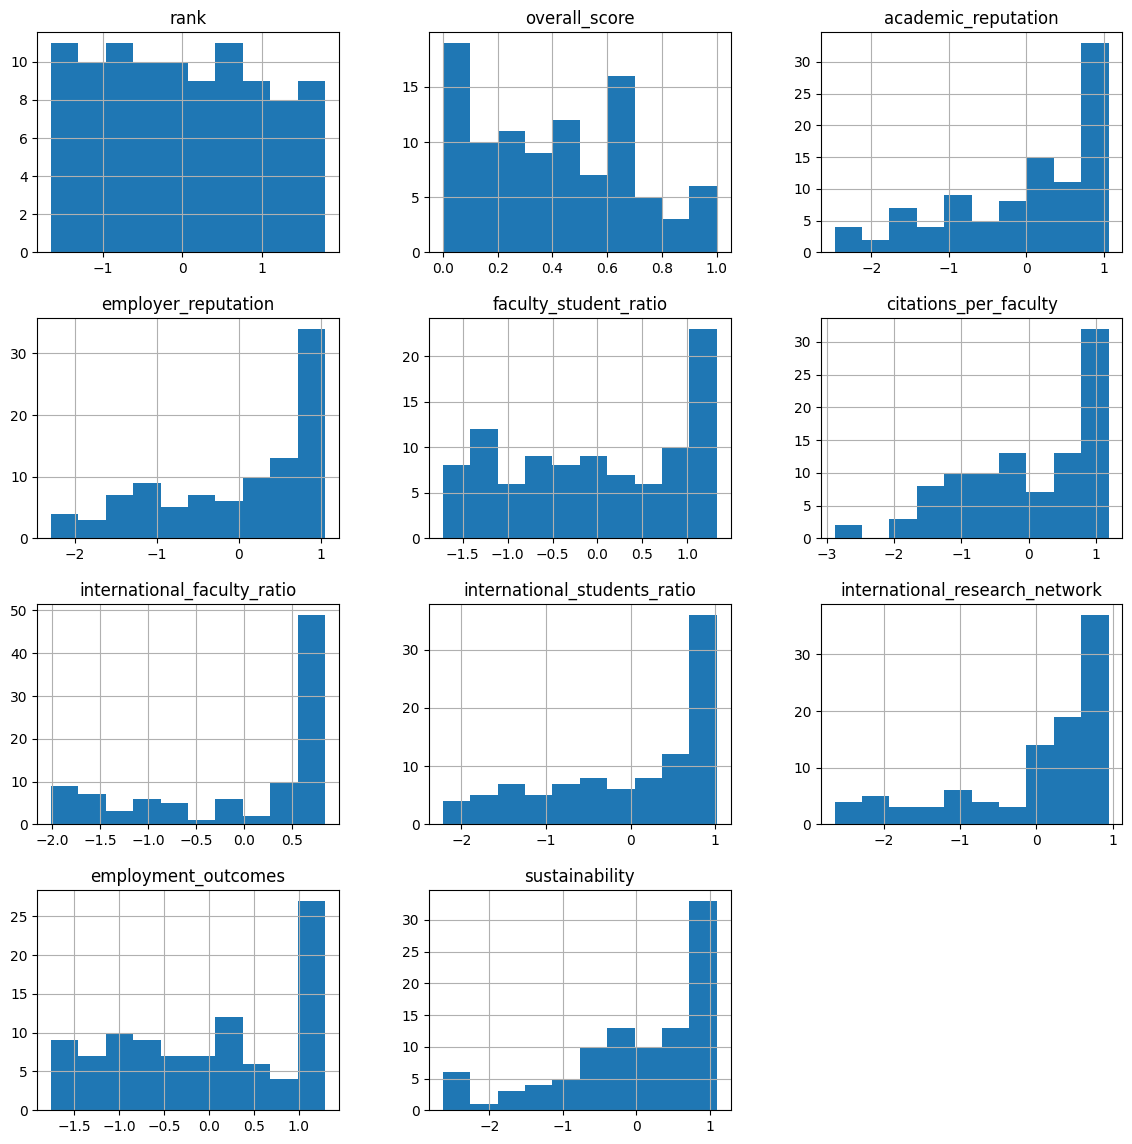

In [12]:
university_data.info()
university_data.hist(figsize=(14, 14))

In [13]:

# Function to split the test set
def test_split(song_data, test_size: float = 0.3, seed=seed):
    '''
    Split the dataset into training/validation and test sets using the `train_test_split()` function.
    '''
    # ========== INSERT YOUR CODE BELOW ==========
    y = song_data["overall_score"]
    X = song_data.drop(columns="overall_score")

    X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)
    # ========== CODE ENDS HERE ============

    return (X_train_val.reset_index(drop=True),
            y_train_val.reset_index(drop=True),
            X_test.reset_index(drop=True),
            y_test.reset_index(drop=True))

# Function to create train-validation pairs
def train_val_split(X_train_val, y_train_val, k=5, seed=seed):
    '''
    Generate k pairs of training and validation sets based on shuffled indices.
    The output is a list of tuples: [(X_train1, y_train1, X_val1, y_val1), ..., (X_traink, y_traink, X_valk, y_valk)]
    '''
    index_shuffle = list(X_train_val.index)
    random.shuffle(index_shuffle)
    index_split_list = [[index_shuffle[i+j] for i in range(0, len(index_shuffle), 5) if i+j < len(index_shuffle)] for j in range(5)]
    train_val_pairs = [(None, None, None, None) for _ in range(k)]
    # ========== INSERT YOUR CODE BELOW ==========
    train_val_pairs = []
    for i in range(k):
        # get validation indices
        validation_indices = index_split_list[i]

        # get training indices
        training_indices = []
        for j in range(k):
            if j != i:
                training_indices.extend(index_split_list[j])


        X_train = X_train_val.loc[training_indices]
        y_train = y_train_val.loc[training_indices]
        X_val = X_train_val.loc[validation_indices]
        y_val = y_train_val.loc[validation_indices]


        train_val_pairs.append((X_train, y_train, X_val, y_val))
    # ========== CODE ENDS HERE ============
    return train_val_pairs

X_train_val, y_train_val, X_test, y_test = test_split(university_data)
train_val_pairs = train_val_split(X_train_val, y_train_val)


In [14]:
# Function to calculate MSE
def MSE_loss(prediction: np.ndarray, actual: np.ndarray):
    # ========== INSERT YOUR CODE BELOW ==========
    return np.mean(np.square((prediction - actual)))
    # ========== CODE ENDS HERE ============


# Define the number of epochs and learning rate
# ========== INSERT YOUR CODE BELOW ==========
num_features = X_train_values.shape[1]
learning_rate = 0.01
num_epochs = 1000
regularization_strength = 0.1

logreg_trainer = LogisticRegressionTrainer(
    num_features=num_features,
    learning_rate=learning_rate,
    num_epochs=num_epochs,
    lambd=regularization_strength
)
# ========== CODE ENDS HERE ============
k = 5
train_loss_history = [[] for _ in range(k)]
val_loss_history = [[] for _ in range(k)]

theta_optimal = None
optimal_index = None
lowest_loss = None

for i in range(k):
    X_train, y_train, X_val, y_val = train_val_pairs[i]

    # Convert dataframe to numpy array
    # ========== INSERT YOUR CODE BELOW ==========
    X_train_values = X_train.values
    y_train_values = y_train.values
    X_val_values = X_val.values
    y_val_values = y_val.values
    # ========== CODE ENDS HERE ============

    # Initialize theta
    # ========== INSERT YOUR CODE BELOW ==========
    theta = np.zeros(X_train_values.shape[1])
    # ========== CODE ENDS HERE ============

    for epoch in trange(num_epochs, desc="Epoch"):
        # Calculate loss and update loss histories
        # ========== INSERT YOUR CODE BELOW ==========
        # calculate the train prediction and loss with actual values
        train_predicted = logreg_trainer.sigmoid(np.dot(np.c_[np.ones((X_train_values.shape[0], 1)), X_train_values], logreg_trainer.theta))
        train_loss_history[i].append(MSE_loss(train_predicted, logreg_trainer.sigmoid(y_train_values)))

        # calculate the validation prediction and loss with actual values
        val_predicted = logreg_trainer.sigmoid(np.dot(np.c_[np.ones((X_val_values.shape[0], 1)), X_val_values], logreg_trainer.theta))
        val_loss_history[i].append(MSE_loss(val_predicted, logreg_trainer.sigmoid(y_val_values)))
        # ========== CODE ENDS HERE ============

        # Parameter update
        # ========== INSERT YOUR CODE BELOW ==========
        logreg_trainer.gradient_descent_step(X_train_values, y_train_values)
        # ========== CODE ENDS HERE ============


    # Validate and find the best parameters, storing them in theta_optimal and optimal_index
    # ========== INSERT YOUR CODE BELOW ==========
    if lowest_loss is None or val_loss_history[i][-1] < lowest_loss:
        lowest_loss = val_loss_history[i][-1]
        theta_optimal = theta
        optimal_index = i
    # ========== CODE ENDS HERE ============

print(f"Final training loss for the best model: {train_loss_history[optimal_index][-1]}")
print(f"Final validation loss for the best model: {val_loss_history[optimal_index][-1]}")
print("Best model parameters:", theta_optimal)

plt.plot(np.arange(num_epochs), train_loss_history[optimal_index], label="Training Loss")
plt.plot(np.arange(num_epochs), val_loss_history[optimal_index], label="Validation Loss")
plt.title("Training and Validation Loss over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

# Test set evaluation
# ========== INSERT YOUR CODE BELOW ==========
X_test_values = X_test.values
y_test_values = y_test.values
# Assuming y_test is your test label vector
test_predictions = logreg_trainer.sigmoid(np.dot(np.c_[np.ones((x_test.shape[0], 1)), x_test], logreg_trainer.theta))
test_loss = logreg_trainer.cross_entropy_loss(test_predictions, logreg_trainer.sigmoid(y_test))
test_accuracy = accuracy(y_true=y_test, y_pred=test_predictions >= 0.5)

logreg_trainer.test_loss = test_loss
logreg_trainer.test_acc = test_accuracy
# ========== CODE ENDS HERE ============
print(f"Test set loss: {test_loss}")


Epoch:   0%|          | 0/1000 [00:00<?, ?it/s]

ValueError: shapes (54,11) and (13,) not aligned: 11 (dim 1) != 13 (dim 0)